In [6]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import EfficientNetB3

import warnings
warnings.filterwarnings("ignore")

In [7]:
def train_df(tr_path):
    classes = []
    class_paths = []
    files = os.listdir(tr_path)
    for file in files:
        label_dir = os.path.join(tr_path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    image_classes = pd.Series(classes, name='Class')
    image_paths = pd.Series(class_paths, name='Class Path')
    tr_df = pd.concat([image_paths, image_classes], axis=1)
    return tr_df

In [11]:
tr_df = train_df(r"C:\Users\apoor\Desktop\SEMESTER 6\Machine Learning\CNN\data")

In [12]:
tr_df

Class Path  Class
0    C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...  happy
1    C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...  happy
2    C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...  happy
3    C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...  happy
4    C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...  happy
..                                                 ...    ...
449  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad
450  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad
451  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad
452  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad
453  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad

[454 rows x 2 columns]

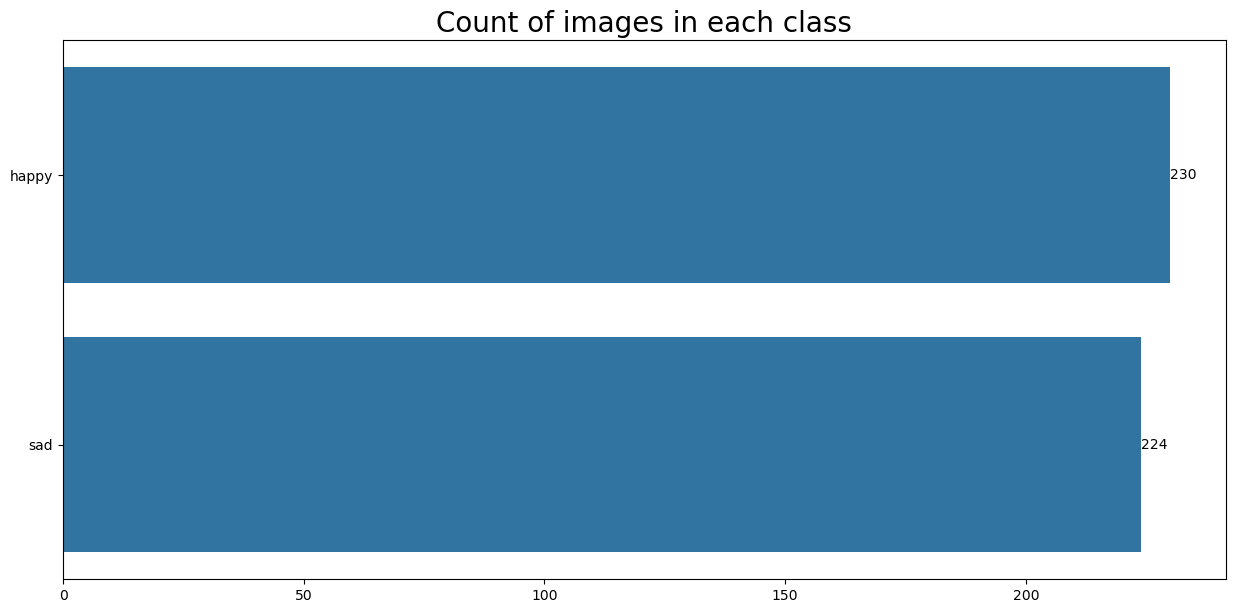

In [13]:
# Count of images in each class
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

In [14]:
tr_df, ts_df = train_test_split(tr_df,  train_size= 0.8, shuffle= True, random_state= 20)
valid_df, ts_df = train_test_split(ts_df,  train_size= 0.5, shuffle= True, random_state= 20)


In [15]:
valid_df


Class Path  Class
379  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad
378  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad
217  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...  happy
30   C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...  happy
400  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad
181  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...  happy
309  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad
285  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad
197  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...  happy
61   C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...  happy
74   C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...  happy
397  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad
92   C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...  happy
348  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad
238  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad
323  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad
408  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad
46   C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...  happy
211  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...  happy
165  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...  happy
131  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...  happy
326  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad
9    C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...  happy
444  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad
175  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...  happy
219  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...  happy
237  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad
303  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad
325  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad
63   C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...  happy
179  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...  happy
72   C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...  happy
7    C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...  happy
321  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad
318  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad
354  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad
106  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...  happy
395  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad
307  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad
382  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad
200  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...  happy
418  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad
47   C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...  happy
429  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...    sad
189  C:\Users\apoor\Desktop\SEMESTER 6\Machine Lear...  happy

In [16]:
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (224, 224, 3)

gen = ImageDataGenerator(rotation_range=30,
                         shear_range=.1,
                         zoom_range=.1,
                         horizontal_flip=True)


ts_gen = ImageDataGenerator()

tr_gen = gen.flow_from_dataframe(tr_df, x_col= 'Class Path',
                                 y_col= 'Class', target_size= img_size,
                                 color_mode= 'rgb', shuffle= True,
                                 batch_size= batch_size)

valid_gen = gen.flow_from_dataframe(valid_df, x_col= 'Class Path',
                                    y_col= 'Class', target_size= img_size,
                                    color_mode= 'rgb', shuffle= True,
                                    batch_size= batch_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col= 'Class Path',
                                 y_col= 'Class', target_size= img_size,
                                 color_mode= 'rgb', shuffle= False,
                                 batch_size= batch_size)

Found 363 validated image filenames belonging to 2 classes.
Found 45 validated image filenames belonging to 2 classes.
Found 46 validated image filenames belonging to 2 classes.


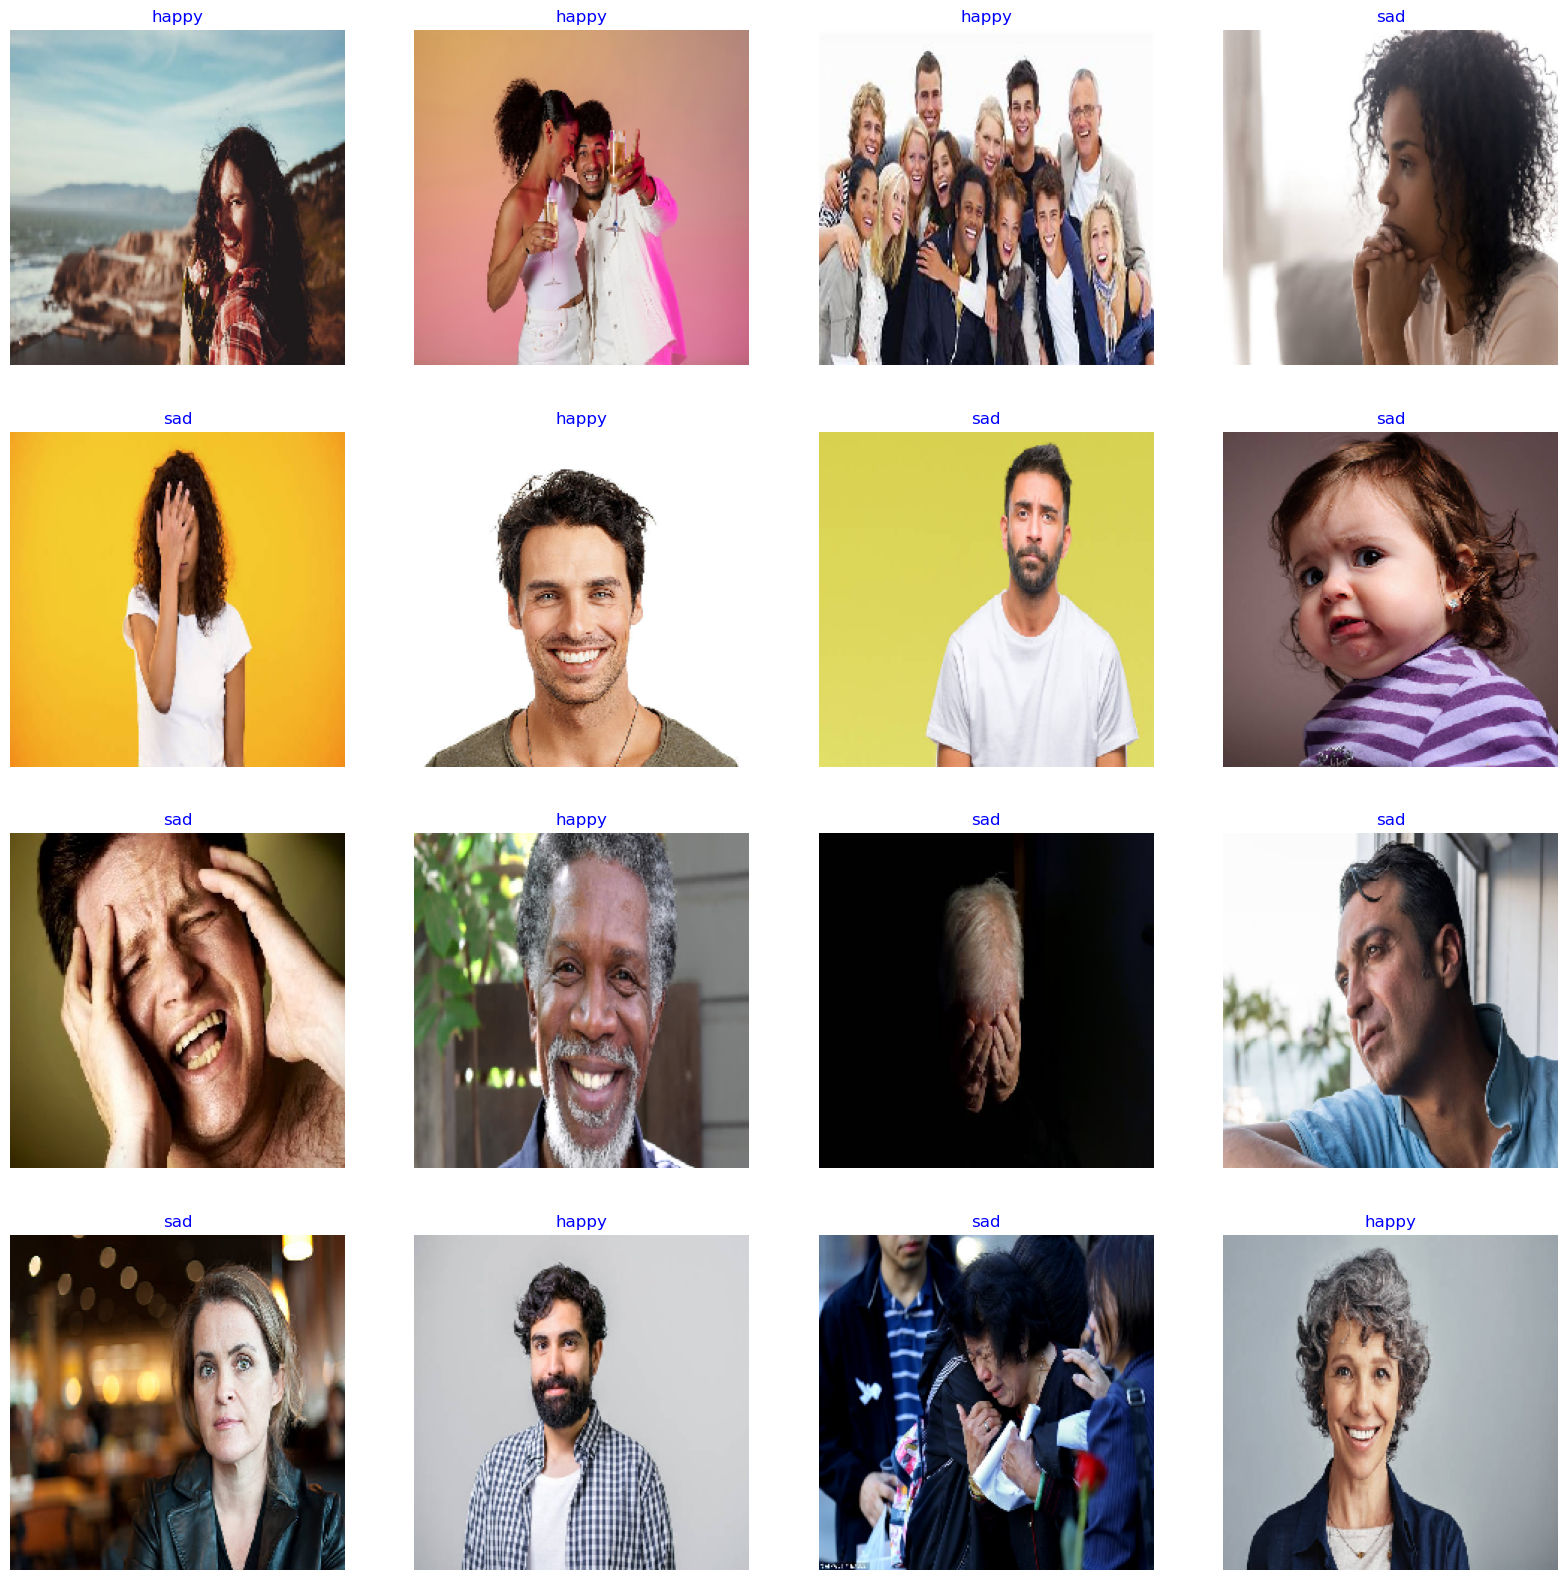

In [17]:
g_dict = tr_gen.class_indices      
classes = list(g_dict.keys())       
images, labels = next(ts_gen) 

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       
    plt.imshow(image)
    index = np.argmax(labels[i])  
    class_name = classes[index]   
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()


In [18]:
base_model = EfficientNetB3(include_top=False, weights="imagenet",
                      input_shape= img_shape, pooling= 'max')

model = Sequential([
    base_model,
    Dense(512,activation= 'relu'),
    Dropout(rate= 0.40, seed= 20),
    Dense(2, activation= 'softmax')
])

for layer in base_model.layers:
    layer.trainable = False
    

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)          │ (None, 1536)                │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,571,505 (44.14 MB)

 Trainable params: 787,970 (3.01 MB)

 Non-trainable params: 10,783,535 (41.14 MB)

In [19]:
for layer in base_model.layers[1000:]:
    layer.trainable = True
    
model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)          │ (None, 1536)                │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,571,505 (44.14 MB)

 Trainable params: 787,970 (3.01 MB)

 Non-trainable params: 10,783,535 (41.14 MB)

In [20]:
for layer in base_model.layers:
    layer.trainable = True
    
model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)          │ (None, 1536)                │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,571,505 (44.14 MB)

 Trainable params: 11,484,202 (43.81 MB)

 Non-trainable params: 87,303 (341.03 KB)

In [21]:
logdir='logs'

In [22]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [23]:
#     layer.trainable = False
hist = model.fit(tr_gen, epochs=10, validation_data=valid_gen, callbacks=[tensorboard_callback])

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 362s 6s/step - accuracy: 0.5646 - loss: 5.7885 - precision_2: 0.5646 - recall_2: 0.5646 - val_accuracy: 0.5778 - val_loss: 1.9087 - val_precision_2: 0.5778 - val_recall_2: 0.5778
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 128s 6s/step - accuracy: 0.7996 - loss: 0.6521 - precision_2: 0.7996 - recall_2: 0.7996 - val_accuracy: 0.6444 - val_loss: 1.0584 - val_precision_2: 0.6444 - val_recall_2: 0.6444
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 129s 6s/step - accuracy: 0.8512 - loss: 0.4108 - precision_2: 0.8512 - recall_2: 0.8512 - val_accuracy: 0.8222 - val_loss: 0.7162 - val_precision_2: 0.8222 - val_recall_2: 0.8222
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 130s 6s/step - accuracy: 0.8469 - loss: 0.3592 - precision_2: 0.8469 - recall_2: 0.8469 - val_accuracy: 0.8222 - val_loss: 0.6675 - val_precision_2: 0.8222 - val_recall_2: 0.8222
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 123s 5s/step - accuracy: 0.8895 - loss: 0.2678 - precision_2: 0.8895 - recall_2: 0.8895 - val_

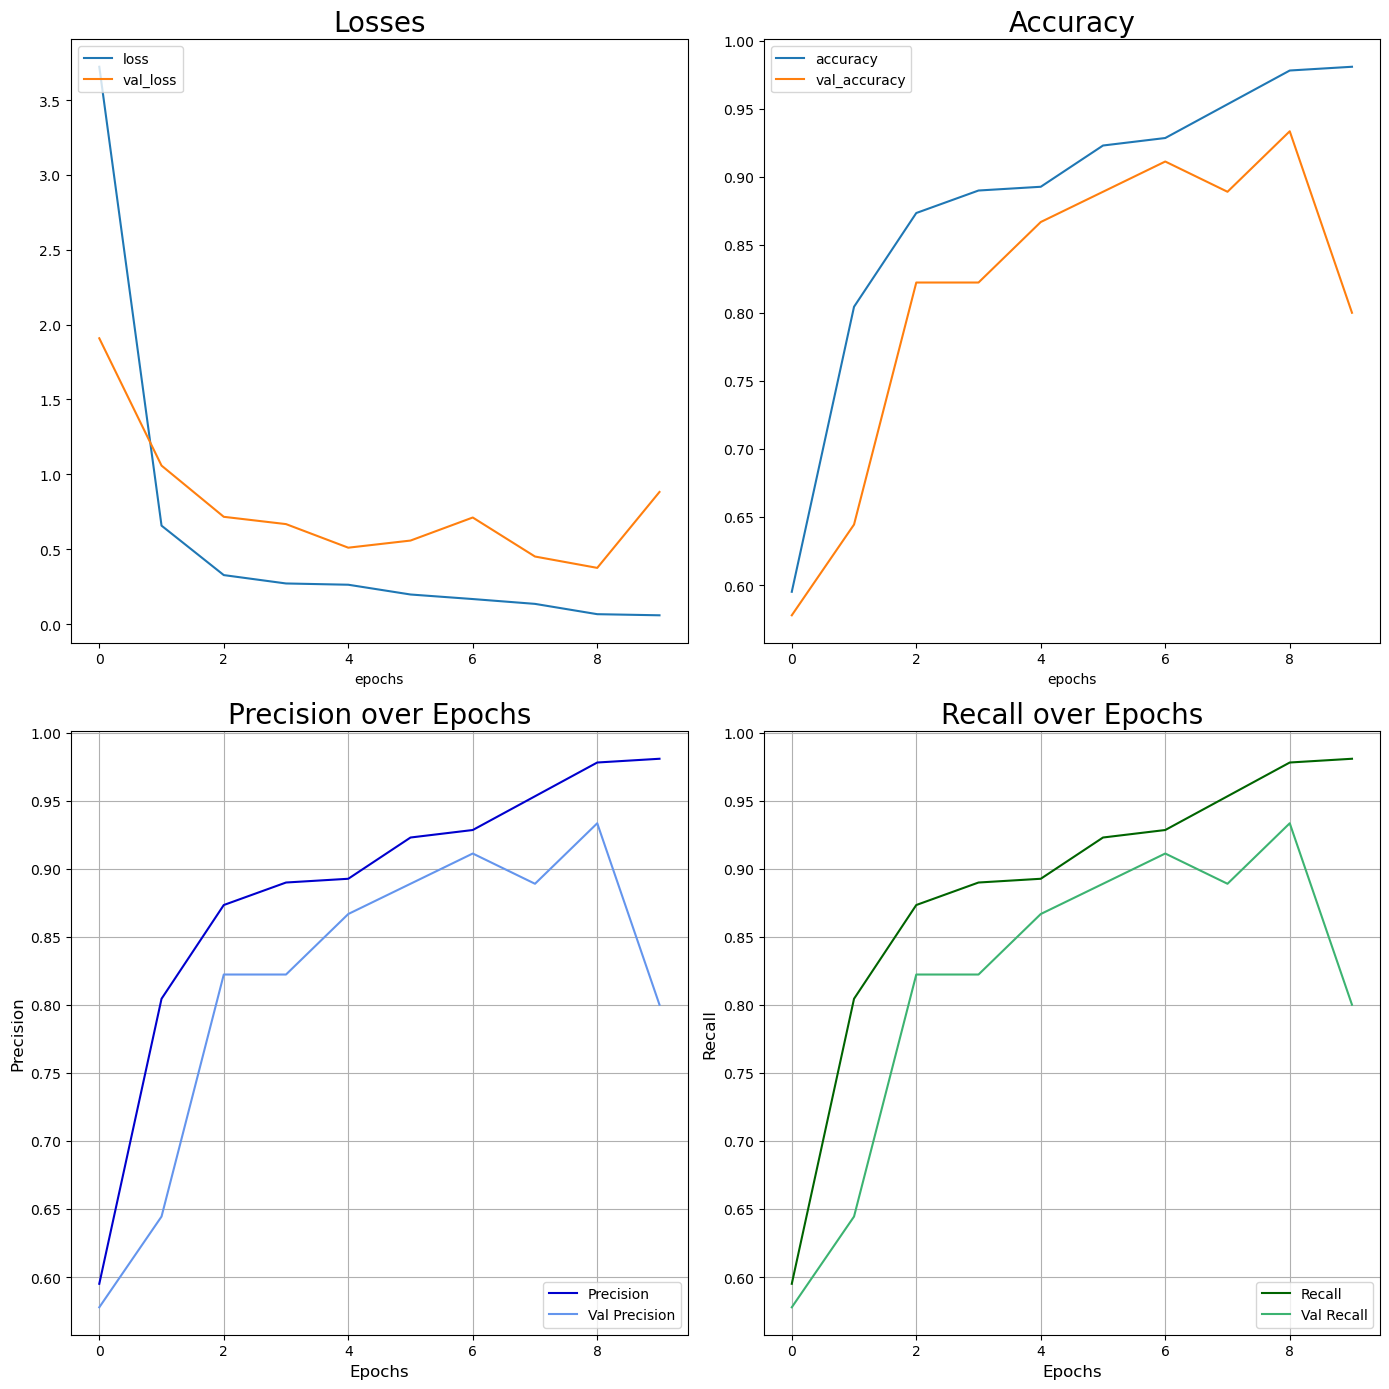

In [30]:
plt.figure(figsize= (14, 14))

plt.subplot(2,2,1)
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.legend(loc="upper left")

plt.subplot(2,2,2)
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy', fontsize=20)
plt.xlabel('epochs')
plt.legend(loc="upper left")

plt.subplot(2, 2, 3)
plt.plot(hist.history['precision_2'], label='Precision', color='mediumblue')
plt.plot(hist.history['val_precision_2'], label='Val Precision', color='cornflowerblue')
plt.title('Precision over Epochs', fontsize=20)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.grid(True)
plt.legend(loc="lower right")

plt.subplot(2, 2, 4)
plt.plot(hist.history['recall_2'], label='Recall', color='darkgreen')
plt.plot(hist.history['val_recall_2'], label='Val Recall', color='mediumseagreen')
plt.title('Recall over Epochs', fontsize=20)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.grid(True)
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()



In [29]:
print(hist.history.keys())


dict_keys(['accuracy', 'loss', 'precision_2', 'recall_2', 'val_accuracy', 'val_loss', 'val_precision_2', 'val_recall_2'])


In [31]:
train_score = model.evaluate(tr_gen, verbose= 1)
valid_score = model.evaluate(valid_gen, verbose= 1)
test_score = model.evaluate(ts_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

23/23 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 1.0000 - loss: 0.0041 - precision_2: 1.0000 - recall_2: 1.0000
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7984 - loss: 1.0517 - precision_2: 0.7984 - recall_2: 0.7984
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.7959 - loss: 0.6096 - precision_2: 0.7959 - recall_2: 0.7959   
Train Loss:  0.006025301292538643
Train Accuracy:  1.0
--------------------
Validation Loss:  0.9521557092666626
Validation Accuracy:  0.800000011920929
--------------------
Test Loss:  0.5105953812599182
Test Accuracy:  0.8260869383811951


3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 6s/step 
              precision    recall  f1-score   support

       happy       0.79      0.92      0.85        24
         sad       0.89      0.73      0.80        22

    accuracy                           0.83        46
   macro avg       0.84      0.82      0.82        46
weighted avg       0.84      0.83      0.82        46



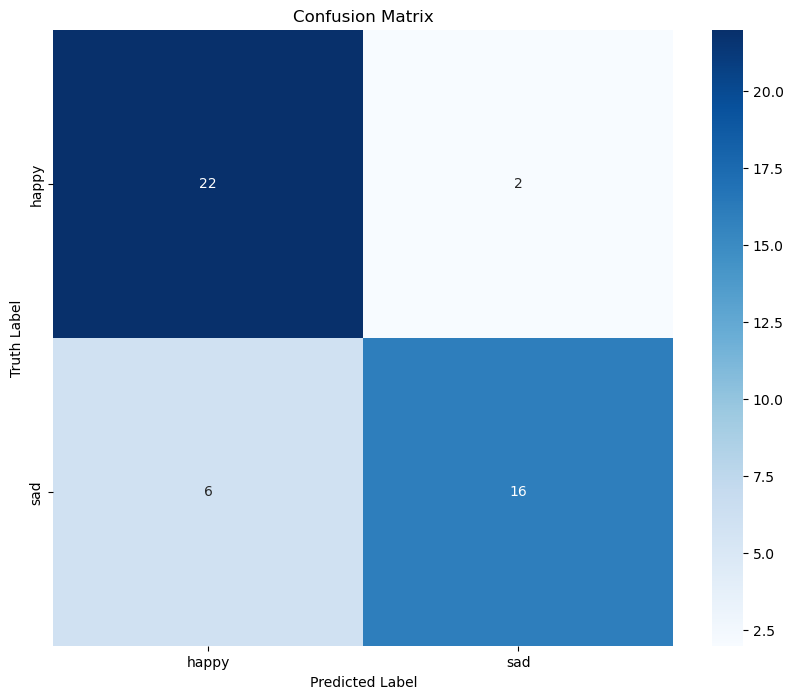

In [33]:
# Get predictions
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

# Print classification report
print(classification_report(ts_gen.classes, y_pred, target_names=classes))

# Confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(g_dict.keys())

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.title('Confusion Matrix')
plt.show()
